(sec:data)=
# Data analysis

## Data analysis and open data

[Data analysis](https://en.wikipedia.org/wiki/Data_analysis) is the process of inspecting, cleansing, transforming, and modeling data with the goal of discovering useful information. As part of the field of [data science](https://en.wikipedia.org/wiki/Data_science), data analysis is today of paramount importance in life sciences as can be no better exemplified than by the scientific discoveries enabled by the [Human Genome Project](https://www.genome.gov/human-genome-project) and the [Human Protein Atlas](https://www.proteinatlas.org/).

Alongside this *data revolution*, there is the growing idea of [open data](https://en.wikipedia.org/wiki/Open_data), which is the idea that some data should be freely available to everyone to use and republish as they wish, without restrictions from copyright, patents or other mechanisms of control. Today, it is a common practice to make data from government-funded research available in this way and the number of open and curated datasets is growing at a fast and accelerated rate. Perform a search for "open datasets" on the internet and the response is overwhelming, which can make navigation difficult.

## UNICEF malaria datasets

As a simple illustration of data analysis, we will study the [UNICEF datasets on malaria](https://data.unicef.org/resources/dataset/malaria/) with use of the [pandas](sec:pandas) module in Python. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option("display.max_columns", 50)

These particular datasets can be freely downloaded in the form of a single Excel file with multpile spreadsheets, and we will look at two of these sheets.

### Diarrhoea care dataset

The first sheet collects the percentages of children under the age of five years who have had diarrhoea in the two weeks preceding the survey for whom advice or treatment was sought from a health facility or provider.

We load this sheet into a pandas `DataFrame`, leaving out the first five rows of description that precede the actual data. Column "A" is empty in the spreadsheet and is therefore also left out in the import process.

In [2]:
df_dc = pd.read_excel(
    "../data_input/Child-Health-Coverage-Database-July-2021.xlsx",
    sheet_name="DiarCare",
    skiprows=[0, 1, 2, 3, 4],
    usecols="B:V",
)

#### Getting to know your dataset

At this point, you should start by getting to know your dataset. In a Jupyter notebook environment, a nice printout of the dataframe is provided by just typing its name and running the code cell. Some datasets can be very large and you may first wish to print out the `shape` attribute of the dataframe.

In [3]:
df_dc.shape

(354, 21)

We see that this dataframe contains 354 surveys collecting information and data in 21 colunms. Next, let us print out the column headers and the first five rows of the dataframe with use of the `head` method.

In [4]:
df_dc.head(5)

,ISO,Countries and areas,UNICEF Reporting Region,UNICEF Programme Region,World Bank Income Group (2020),Year,Short Source,Long Source,National,Male,Female,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,None,Primary,Sec & \nHigher
0,AFG,Afghanistan,South Asia,ROSA,Low income,2011,MICS 2010-2011,Multiple Indicator Cluster Survey 2010-2011,18.1,17.5,18.8,17.6,21.4,13.8,17.3,20.6,18.8,20.3,17.8,21.8,NaN
1,AFG,Afghanistan,South Asia,ROSA,Low income,2015,DHS 2015,Demographic and Health Survey 2015,54.2,55.1,53.0,53.7,55.1,49.9,55.0,50.5,56.7,58.3,53.5,56.2,68.2
2,AFG,Afghanistan,South Asia,ROSA,Low income,2018,Afghanistan Health Survey 2018,Afghanistan Health Survey 2018. Amsterdam: KIT...,60.3,58.7,62.0,61.7,55.6,57.8,69.1,64.0,59.0,53.2,60.9,57.8,NaN
3,AGO,Angola,Eastern and Southern Africa,ESARO,Lower middle income,2016,DHS 2015-2016,Demographic and Health Survey 2015-2016,44.6,45.1,44.1,39.2,47.8,34.7,41.6,54.0,39.1,55.0,37.1,42.8,53.2
4,ALB,Albania,Eastern Europe and Central Asia,ECARO,Upper middle income,2000,MICS 2000,Multiple Indicator Cluster Survey 2000,6.4,3.4,11.2,7.1,5.0,10.3,NaN,1.8,9.3,7.5,NaN,7.6,3.2


Afghanistan is the first listed country and we can see that three surveys have been performed during the years of 2011, 2015, and 2018. An overviewing statistics of the dataset is provided with the `describe` method.

In [5]:
df_dc.describe()

,Year,National,Male,Female,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,None,Primary,Sec & \nHigher
count,354.000000,354.000000,341.000000,336.000000,338.000000,333.000000,298.000000,299.000000,293.000000,287.000000,278.000000,250.000000,279.000000,289.000000
mean,2009.788136,36.088701,35.546921,34.898512,35.133728,36.796997,32.441611,33.257525,35.767577,36.373171,39.347122,31.271600,34.540502,36.797924
std,6.004038,22.038643,21.717297,21.156618,21.935561,21.280747,21.370426,21.340200,22.720759,22.033651,22.959443,20.530978,21.455102,22.130360
min,1990.000000,0.400000,0.800000,0.300000,0.600000,0.800000,1.100000,0.000000,0.600000,1.100000,1.400000,1.300000,0.500000,1.300000
25%,2006.000000,14.200000,14.100000,14.350000,14.000000,16.300000,13.050000,12.900000,14.200000,14.950000,15.250000,14.100000,13.750000,12.400000
50%,2010.000000,37.200000,36.400000,35.300000,35.850000,39.100000,30.800000,33.000000,35.300000,38.400000,42.200000,29.850000,33.500000,39.100000
75%,2014.000000,52.575000,52.700000,51.325000,52.975000,52.400000,48.025000,49.350000,53.600000,53.400000,56.950000,46.600000,52.150000,54.400000
max,2020.000000,99.600000,89.500000,91.900000,92.000000,93.900000,86.000000,88.800000,90.100000,95.400000,96.100000,100.000000,100.000000,84.300000


It becomes immediately clear that, among other noticeable things, the illness affects equally children of different gender.

A histogram plot more clearly shows the dire severity of the situation. 

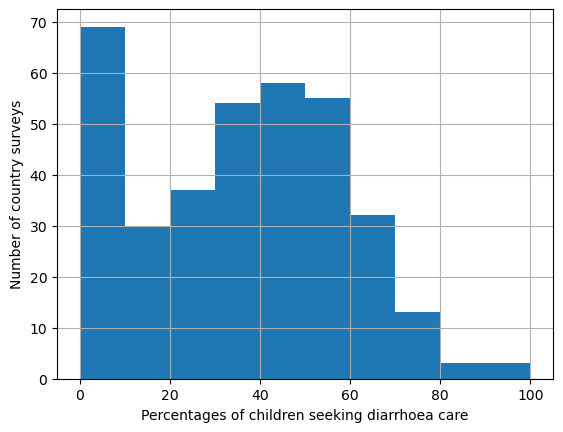

In [6]:
df_dc["National"].hist(bins=range(0, 101, 10))

plt.ylabel("Number of country surveys")
plt.xlabel("Percentages of children seeking diarrhoea care")

plt.show()

### Use of insecticide-treated mosquito nets

The second dataset that we will investigate collects information about the use of insecticide-treated mosquito nets (ITNs). The percentages of children under the age of five years who slept under a ITNs the night prior to the survey are given.

In [7]:
df_itn = pd.read_excel(
    "../data_input/Child-Health-Coverage-Database-July-2021.xlsx",
    sheet_name="ITN",
    skiprows=[0, 1, 2, 3, 4],
    usecols="B:S",
)

#### Getting to know your dataset

We perform the same overview also of this second dataset.

In [8]:
df_itn.head(5)

,ISO,Countries and areas,UNICEF Reporting Region,UNICEF Programme Region,World Bank Income Group (2020),Year,Short Source,Long Source,National,Male,Female,Rural,Urban,Poorest,Second,Middle,Fourth,Richest
0,AFG,Afghanistan,South Asia,ROSA,Low income,2015,DHS 2015,Demographic and Health Survey 2015,4.6,NaN,NaN,4.2,6.1,1.1,3.3,5.5,6.8,6.5
1,AGO,Angola,Eastern and Southern Africa,ESARO,Lower middle income,2007,Other NS 2006-2007,Other NS 2006-2007,18.0,18.0,18.0,19.0,17.0,17.0,16.0,22.0,17.0,14.0
2,AGO,Angola,Eastern and Southern Africa,ESARO,Lower middle income,2011,MIS 2011,Malaria Indicator Survey 2011,25.9,25.4,26.4,24.4,28.9,11.7,17.9,23.4,31.0,34.2
3,AGO,Angola,Eastern and Southern Africa,ESARO,Lower middle income,2016,DHS 2015-2016,Demographic and Health Survey 2015-2016,21.7,21.1,22.2,19.7,23.0,16.8,23.1,23.9,23.0,22.0
4,AZE,Azerbaijan,Eastern Europe and Central Asia,ECARO,Upper middle income,2000,MICS 2000,Multiple Indicator Cluster Survey 2000,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,NaN,1.0


In [9]:
df_itn.describe()

,Year,National,Male,Female,Rural,Urban,Poorest,Second,Middle,Fourth,Richest
count,253.000000,253.000000,223.000000,223.000000,237.000000,241.000000,215.000000,215.000000,217.000000,219.000000,223.000000
mean,2010.324111,33.616996,33.630942,33.756951,34.623207,34.157676,34.399070,36.841860,36.610599,35.426484,34.509417
std,5.647525,23.950246,23.785886,23.871770,24.701427,23.412109,23.815979,24.464575,24.251366,23.539135,23.092252
min,1999.000000,0.200000,0.200000,0.200000,0.200000,0.100000,0.200000,0.100000,0.100000,0.100000,0.200000
25%,2006.000000,9.800000,10.100000,10.000000,9.500000,12.600000,12.200000,15.000000,13.300000,14.800000,14.450000
50%,2011.000000,34.500000,35.900000,34.900000,36.200000,34.000000,34.900000,38.000000,38.000000,35.200000,32.900000
75%,2015.000000,54.100000,54.300000,53.750000,55.000000,53.300000,53.050000,57.400000,57.000000,55.400000,52.900000
max,2020.000000,95.500000,93.100000,94.200000,94.000000,92.500000,95.000000,94.200000,94.000000,91.800000,92.100000


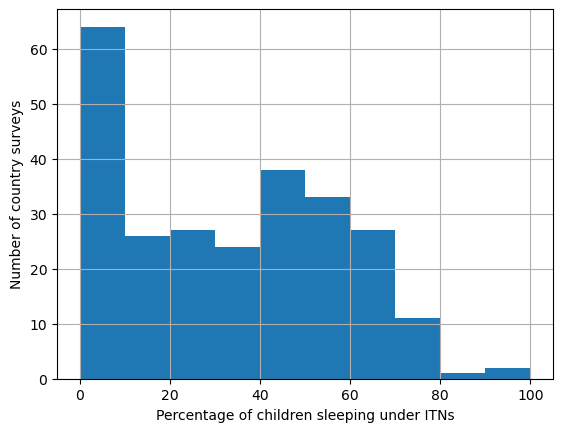

In [10]:
df_itn["National"].hist(bins=range(0, 101, 10))

plt.ylabel("Number of country surveys")
plt.xlabel("Percentage of children sleeping under ITNs")

plt.show()

## Dataset correlation analysis

If we were to set up a model for the spread of malaria, it would be reasonable to introduce the percentage use of ITNs among the population as a parameter. Our intuition tells us that the use of ITNs lowers the spread of malaria such that it consequently reduces the cases of children seeking help for diarrhoea. But it would be valuable to put this hypothesis to test against real data and also to get an idea about the strength of this coupling and thereby set a value on the corresponding parameter. 

From a technical point of view, it can be less than straightforward to interrelate informaion from different datasets. For example, in this particular case, we must consider the fact that the two datasets contain different surveys that only partly overlap and it becomes necessary to perform a data matching to extract any useful information. This represents a situation where pandas shows it strength compared to a conventional spreadsheet data analysis.

Let us do the following:

1. Iterate over all surveys in the *diarrhoea care* (DC) dataset and extract information about the `country` and `source` (unique identifier of the survey). 

2. Iterate over all `country` surveys in the *insecticide-treated mosquito net* (ITN) dataset. 

3. If there is a match for `source`, then save the pair of DC and ITN data points for national averages. 

4. Plot the data points to see if a correlation is visible.

In [11]:
# collect comparable data into lists
data_dc = []
data_itn = []

for idx_dc, row_dc in df_dc.iterrows():

    country = row_dc["ISO"]
    source = row_dc["Short Source"]

    for idx_itn, row_itn in df_itn[df_itn["ISO"] == country].iterrows():

        if row_itn["Short Source"] == source:

            data_dc.append(row_dc["National"])
            data_itn.append(row_itn["National"])

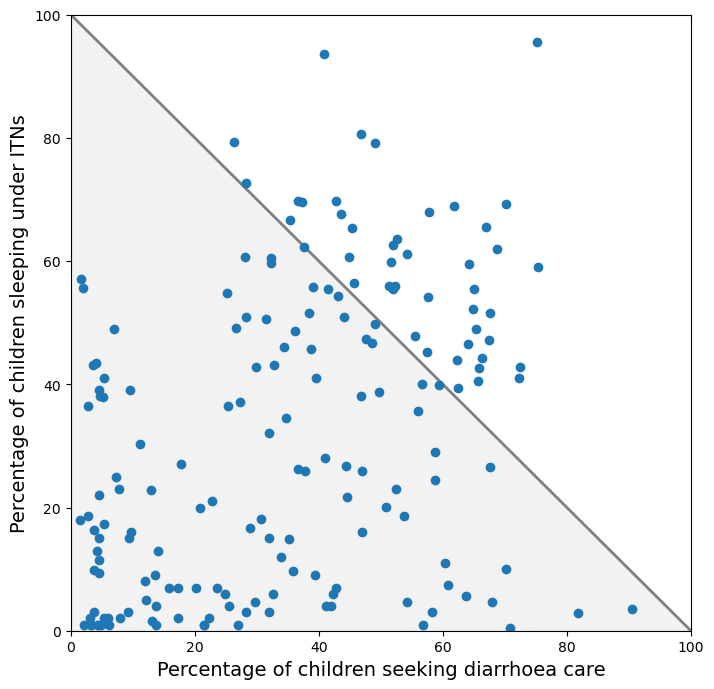

In [12]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(xlim=(0, 100), ylim=(0, 100))

plt.plot([0, 100], [100, 0], "-", color="grey", lw=2)
plt.fill_between([0, 100], [100, 0], alpha=0.10, color="grey")

plt.plot(data_dc, data_itn, "o")

plt.ylabel("Percentage of children sleeping under ITNs", size=14)
plt.xlabel("Percentage of children seeking diarrhoea care", size=14)

plt.show()

## Forming your project
You are encouraged to develop your own model. Below are two examples which may serve as inspiration.

1. **The efficiency of the Swedish model during the COVID-19 Pandemic (Project from CB1020 HT23)** <br>
The COVID-19 pandemic that dominated the years 2020-2022 had a huge impact on the societies around the world. Most affected countries took action to limit the spread of the virus, for example by introducing social distancing, face masks, and vaccination programs. However, the extend to which these restrictions were introduced and enforced varied among countries. By analysing data available through UN and WHO, the effect of the national strategies on the excess mortality of the respective populations can the evaluated, also taking into account factors such as population density and age distribution.

2. **Investigating gene expression patterns of endometriosis (Project from CB1020 HT23)** <br>
Approximately 190 million women and girls of childbearing age are affected by endometriosis, a chronic inflammatory condition. By analyzing the expression levels of genes in samples from endometriosis tissue and normal endometrial tissue, it is possible to identify genes that are differentially expressed in patients with endometriosis. Further statistical analyses can investigate whether some genes can act as biomarkers for initial diagnosis of the condition.
